In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler


In [141]:
df = pd.read_csv('./data/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print(df.head())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# errors='coerce' is a good approach to handle non-numeric values by replacing them with NaN.

# df.replace(' ', np.nan, inplace=True)
# drop customerID column because this will not help in prediction and cause trouble in one hot encoding
df.drop('customerID', axis=1, inplace=True)


In [142]:
def handle_missing_values(df, option : str='mean', label_col : str= None):
    """Fill missing values in data frame in place"""
    
    missing_values = df.isna().sum()
    # print(missing_values)

    # Check if there are any missing values
    if missing_values.any():
        print("There are missing values in the dataset.")
        # Display the count of missing values for each column
        # find the columns with missing values
        columns_with_missing_values = df.columns[missing_values > 0]
        print("Missing values per column:")
        print(missing_values[columns_with_missing_values])

        # fix the missing values
        # we can use df.replace(to_replace=' ', value=-1) to replace all missing values with -1
        for column in columns_with_missing_values:

            if column == label_col:
                df.dropna(subset=[column], inplace=True)
       
            elif option == 'drop':
                df.dropna()
            elif option == 'mean':
                df[column].fillna(df[column].mean(), inplace=True)
            elif option == 'median':
                df[column].fillna(df[column].median(), inplace=True)
            elif option == 'mode':
                df[column].fillna(df[column].mode()[0], inplace=True)
            elif option == 'linear':
                df[column].interpolate(method='linear', limit_direction='forward', inplace=True)
            elif option == 'quadratic':
                df[column].interpolate(method='quadratic', limit_direction='forward', inplace=True)
            elif option == 'cubic':
                df[column].interpolate(method='cubic', limit_direction='forward', inplace=True)
            elif option == 'spline':
                df[column].interpolate(method='spline', order=3, limit_direction='forward', inplace=True)
        
        print("Missing values per column are fixed\n")

    else:
        print("There are no missing values in the dataset.\n")
       


In [112]:
def normalize_numeric_data(df, numeric_cols):
    """Normalize numeric columns in dataframe in place"""

    # print(numeric_cols)
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



In [128]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(df, categorical_cols):
    """One hot encode categorical columns in dataframe in place"""
    one_hot_encoded_data  = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    label_encode(one_hot_encoded_data)

    

    return one_hot_encoded_data 

    

def label_encode(df):
    """Label encode categorical columns in dataframe in place"""
    categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
    # print(categorical_cols)
    label_encoders = {}
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])
        

In [145]:

learn_df = df.copy()

label_col = 'Churn'
handle_missing_values(learn_df, option='mean', label_col=label_col)


# Split into feature and label data
X = learn_df.drop(columns=[label_col])
y = learn_df[label_col]


numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

# Exclude columns with binary data
numeric_cols = [col for col in numeric_cols if len(X[col].unique()) > 2]
# print(numeric_cols)



categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()
# add the binary column back to the list of categorical columns
binary_cols =  [col for col in numeric_cols if len(X[col].unique()) == 2]
categorical_cols.extend(binary_cols)


# print(categorical_cols)

normalize_numeric_data(X, numeric_cols)

X = one_hot_encode(X, categorical_cols)

There are missing values in the dataset.
Missing values per column:
TotalCharges    11
dtype: int64
Missing values per column are fixed



In [ ]:
def LogisticRegression():
    pass


In [151]:
def get_top_score_feature_df(df, y, k=15):
    """Get the top k features with the highest score
        Return a new dataframe with the top k features
    """

    selector = SelectKBest(mutual_info_classif, k=k)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)
        
    # Get the scores
    selector.fit(X, y)
    scores = selector.scores_

    df_scores = pd.DataFrame(scores, columns=["Score"], index=X_train.columns)
    df_scores = df_scores.sort_values(by="Score", ascending=False)

    # keep the top k features of the df DataFrame
    top_score_feature_df = df[df_scores.index[:k]]


    # Plot the scores
    plt.figure(figsize=(10, 10))
    plt.barh(df_scores.index, df_scores["Score"])
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()
    
    return top_score_feature_df

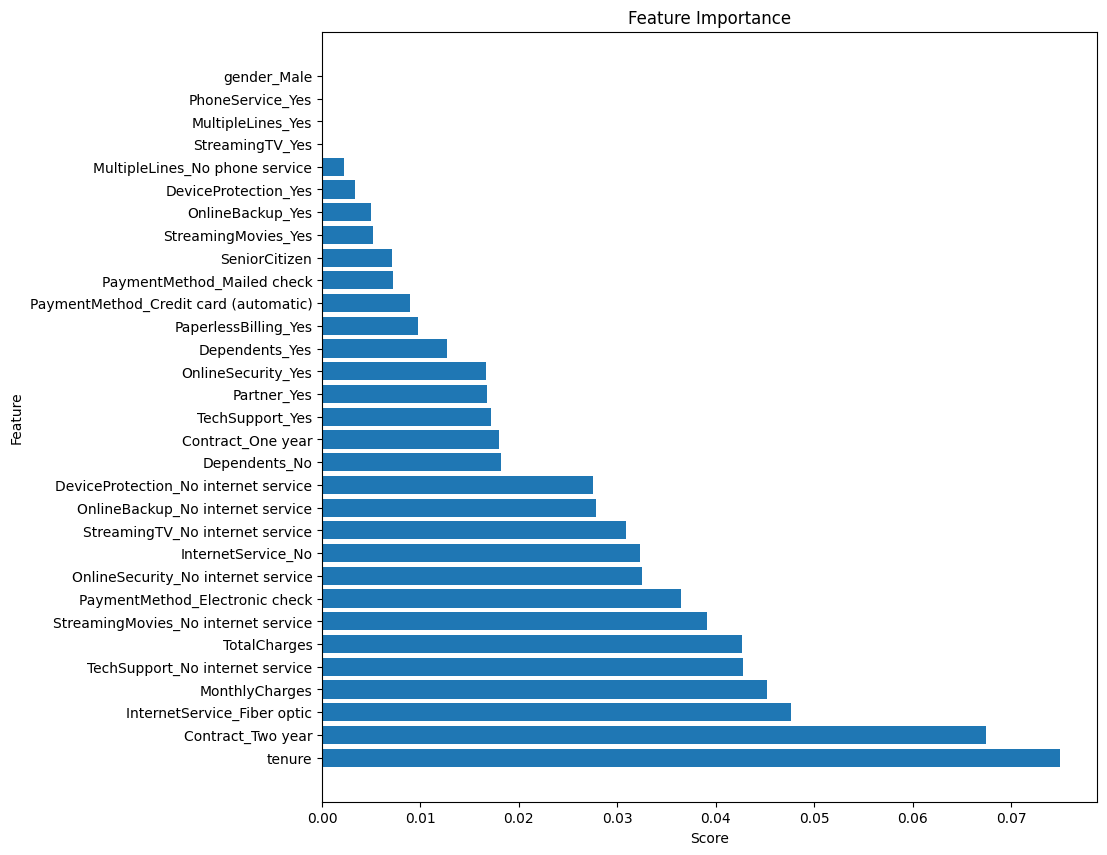

In [154]:
top_score_feature_df = get_top_score_feature_df(X, y, k=10)

In [153]:
top_score_feature_df.head()

,tenure,Contract_Two year,InternetService_Fiber optic,MonthlyCharges,TotalCharges,StreamingTV_No internet service,InternetService_No,StreamingMovies_No internet service,TechSupport_No internet service,PaymentMethod_Electronic check
0,0.013889,0,0,0.115423,0.001275,0,0,0,0,1
1,0.472222,0,0,0.385075,0.215867,0,0,0,0,0
2,0.027778,0,0,0.354229,0.010310,0,0,0,0,0
3,0.625000,0,0,0.239303,0.210241,0,0,0,0,0
4,0.027778,0,1,0.521891,0.015330,0,0,0,0,1
